Import packages

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

Implement Stochastic Gradient Descent (SGD)

In [2]:
# compute and return sigmoid activation value for given input

def sig_act(x):
    return 1.0 / (1 + np.exp(-x))

# loop over dataset X in minibatches of size batchSize
# yield a tuple of the current batched data

def next_batch(X, y, batchSize):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

Argument parser

In [3]:
args = {
    "epochs": 100,
    "alpha": 0.01,
        "batch_size": 32
}

In [4]:
# generate 2-class classifciation with 400 datapoints
# each data point is a 2D vector

(X, y) = make_blobs(n_samples=400,
                    n_features=2,
                    centers=2,
                    cluster_std=2.5,
                    random_state=95)

In [5]:
# insert column of 1's for bias trick

X = np.c_[np.ones((X.shape[0])), X]

In [6]:
# initialize the weight matrix so it has == columns as input features

W = np.random.uniform(size=(X.shape[1],))

# initialize a list to store the loss value for each epoch
lossHistory = []

In [7]:
# loop over the desired number of epochs
for epoch in np.arange(0, args["epochs"]):
    # initialize the total loss
    epochLoss = []

    # loop over data batches
    for (batchX, batchY) in next_batch(X, y, args["batch_size"]):
        # take the dot product b/t current batch of features and W matrix
        # then pass through sigmoid function
        preds = sig_act(batchX.dot(W))

        # we have predictions, now determine error
        error = preds - batchY

        # we have error, now commpute total loss
        loss = np.sum(error ** 2)
        epochLoss.append(loss)

        # gradient update is the dot value between
        # transpose of current batch and error
        gradient = batchX.T.dot(error) / batchX.shape[0]

        # use the gradient to take a step in the correct direction
        W += - args["alpha"] * gradient

    # update the loss history, take the average loss
    lossHistory.append(np.average(epochLoss))

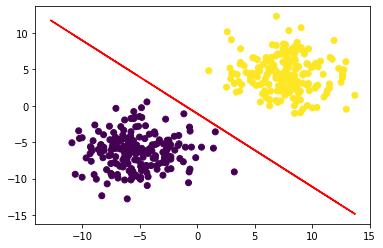

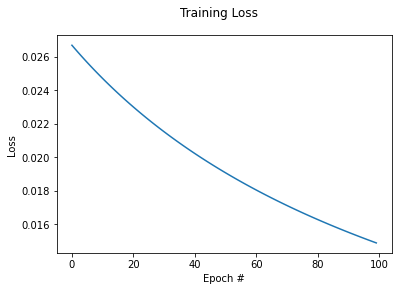

In [8]:
# compute the lins of best fit
# set the sigmoid function to 0
# solve for X2 in terms of X1

Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data + bests fit line
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct figure to plot on
fig = plt.figure()
plt.plot(np.arange(0, args["epochs"]), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()